# Name: Ma Htet Htet Mon
## Topic: Computer Vision and Internet of things
## Task2: Color identification in Images

### Import the libraries

In [1]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

### Mount the google drive to draw the images

In [2]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


### Change directory

In [3]:
cd 'gdrive/MyDrive/Coloridentification'

/content/gdrive/MyDrive/Coloridentification


### Read the image

The type of this input is <class 'numpy.ndarray'>
Shape: (3456, 4608, 3)


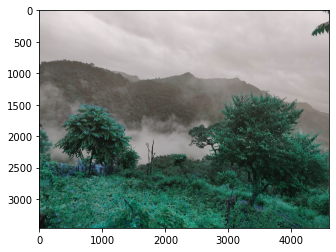

In [4]:
image = cv2.imread('sample_image.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

### Converting BGR to RGB

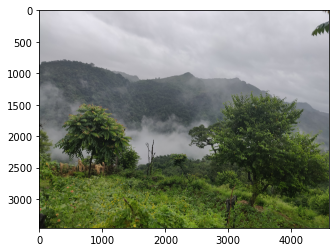

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

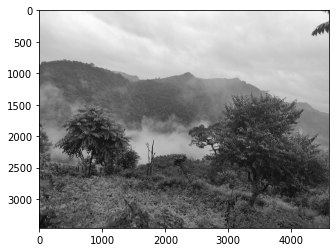

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

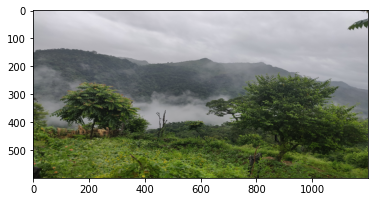

In [ ]:
resizedimage=cv2.resize(image,(1200,600))
plt.imshow(resizedimage)

### RGB to Hex Conversion

In [5]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

### Read image in RGB color space

In [6]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [80]:
def get_colors(image, number_of_colors, show_chart):
    #fig, (plot1, plot2) = plt.subplots(1, 2)
    #plot1.imshow(image)


    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([206.76034888, 206.45446035, 213.92752928]),
 array([55.44458213, 68.43481268, 34.46685879]),
 array([121.16483564, 125.70758609, 125.75587303]),
 array([110.97533589, 126.29661842,  57.55000974]),
 array([84.22675193, 91.06831202, 92.30538902]),
 array([179.78000641, 180.35310614, 186.80732867]),
 array([79.74935215, 97.59645839, 38.843759  ]),
 array([30.59352195, 39.08552324, 21.36711364])]

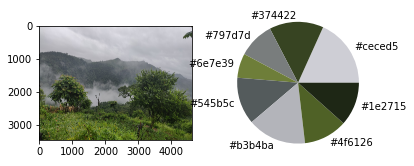

<Figure size 576x432 with 0 Axes>

In [67]:
get_colors(get_image('sample_image.jpg'), 8, True)

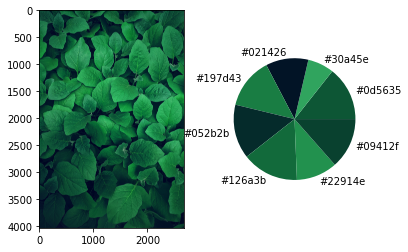

<Figure size 576x432 with 0 Axes>

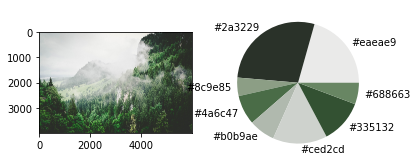

<Figure size 576x432 with 0 Axes>

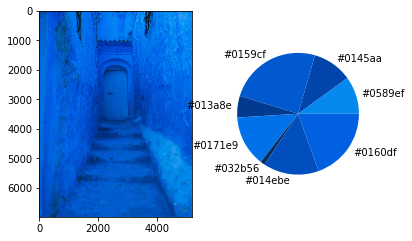

<Figure size 576x432 with 0 Axes>

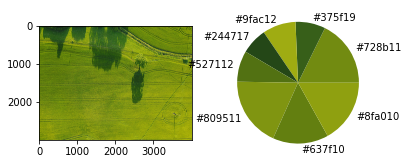

<Figure size 576x432 with 0 Axes>

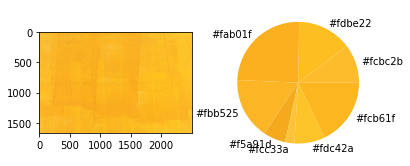

<Figure size 576x432 with 0 Axes>

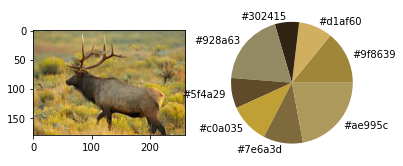

<Figure size 576x432 with 0 Axes>

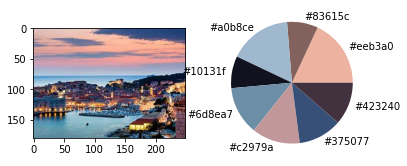

<Figure size 576x432 with 0 Axes>

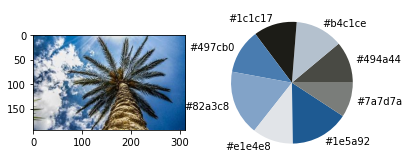

<Figure size 576x432 with 0 Axes>

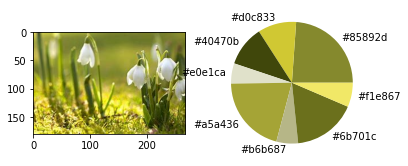

<Figure size 576x432 with 0 Axes>

In [65]:
for i in range(1,10):
  get_colors(get_image(f'images/image_{i}.jpg'), number_of_colors=8, show_chart=True)

### Search Images using color

In [79]:
IMAGE_DIRECTORY = 'images'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0],
    'RED':[255,0,0],
    'PINK':[255,105,180]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

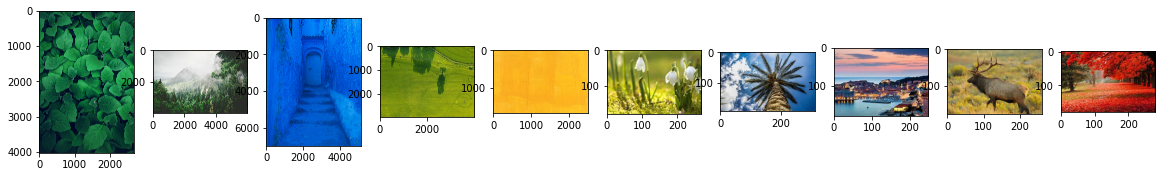

In [10]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

### Match images with color

In [76]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors,False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

### Show selected images

In [77]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

### Selecting for Yellow

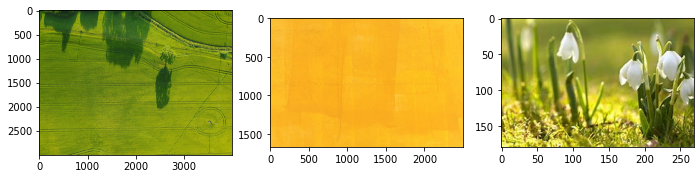

In [28]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)

### Selecting for Green

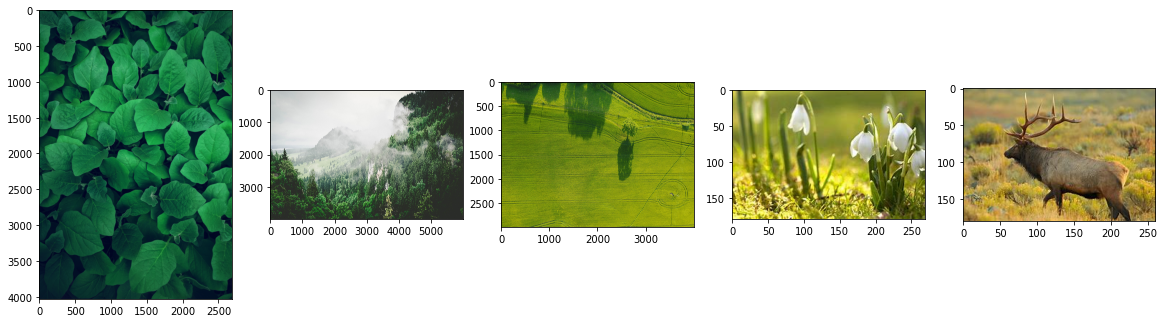

In [14]:
plt.figure(figsize=(20,10))
show_selected_images(images,COLORS['GREEN'],60,5)

### Selecting for Red

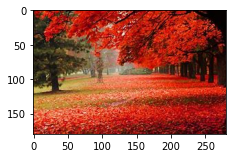

In [20]:
plt.figure(figsize=(20,10))
show_selected_images(images,COLORS['RED'],60,5)

Selecting for Pink

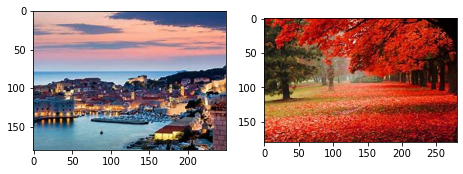

In [26]:
plt.figure(figsize=(20,10))
show_selected_images(images,COLORS['PINK'],60,5)

### Selecting for Blue

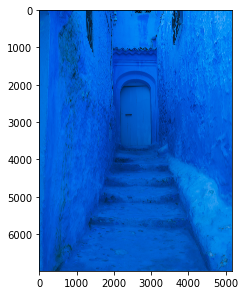

In [81]:
plt.figure(figsize=(20,10))
show_selected_images(images,COLORS['BLUE'],60,5)